# <center> Insurance Claims- Fraud Detection </center>

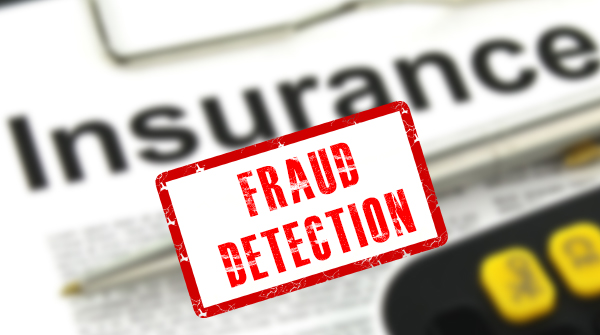

## Problem Statement:

>### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

>In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

>In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importing required dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
#Fetching top 5 rows record
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
#Fetching Buttom 5 record
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [5]:
#Fetching Random sample record
df.sample()

months_as_customer  age  policy_number policy_bind_date policy_state  \
659                 101   32         223404       23-01-2002           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
659    250/500                500                 895.14               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
659       439964  ...                     YES              43600         8720   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
659           4360         30520     Suburu      Legacy      2010   

    fraud_reported _c39  
659              N  NaN  

[1 rows x 40 columns]

### Exploratory Data Analysis

In [6]:
df.shape

(1000, 40)

as per above output we can see that there is 40 columns and 1000 rows present in data-set

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [9]:
#printing the unique values available in the dataset
for i in df.columns:
    print(df[i].value_counts())
    print('*'*70)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**********************************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**********************************************************************
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
**********************************************************************
01-01-2006    3
28

### Checking Null Values

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

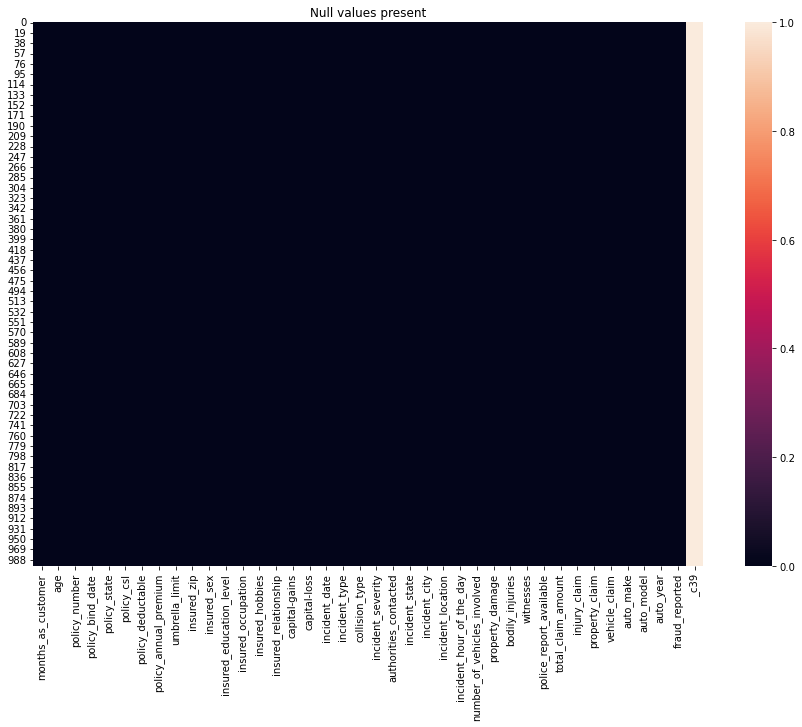

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.title("Null values present")
plt.show()

## Observations:
    
1. There are no null values in any attributes, except '_c39' which is having 1000 null values. Hence excluding the column.
2. Policy number has all unique values, policy_bind_date and incident location are having all unique values, hence excluding these columns.

In [12]:
df.drop(columns=['_c39','policy_number','policy_bind_date','incident_location'],inplace=True)

In [13]:
for i in df.columns:
    print(df[i].unique())
    print('*'*60)
    

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

In [14]:
print(df['collision_type'].value_counts())
print('***************************************')
print(df['police_report_available'].value_counts())
print('***************************************')
print(df['property_damage'].value_counts())
print('***************************************')
print(df['authorities_contacted'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
***************************************
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
***************************************
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
***************************************
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [15]:
#some of records have '?' values in the data set, let us replace them by the most occured value
df['collision_type'].replace('?','Rear Collision',inplace=True)
df['police_report_available'].replace('?','NO',inplace=True)
df['property_damage'].replace('?','NO',inplace=True)

df['authorities_contacted'].replace('None', 'Police',inplace=True)

In [16]:
df['authorities_contacted'].value_counts()

Police       383
Fire         223
Other        198
Ambulance    196
Name: authorities_contacted, dtype: int64

## Univariate Analysis
Let use visualize relationship between each attributes.


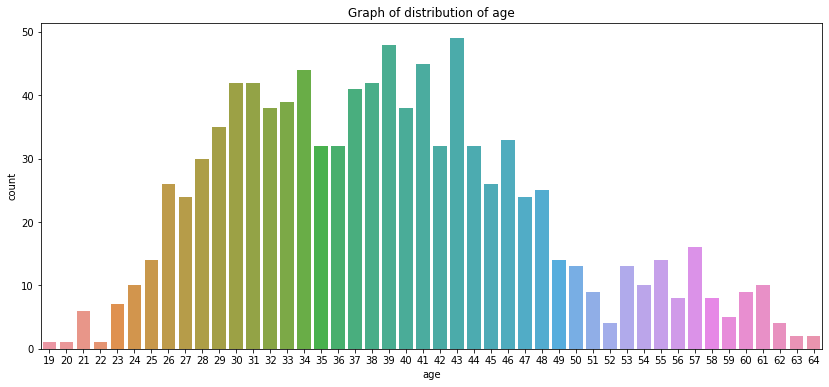

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(df['age'])
plt.title('Graph of distribution of age')
plt.show()

Count of policies_state:
  OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


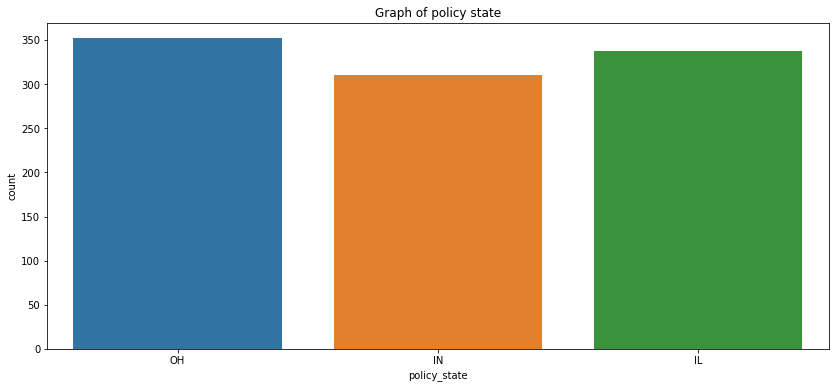

In [18]:
print('Count of policies_state:\n ',df['policy_state'].value_counts())

plt.figure(figsize=(14,6))
sns.countplot(df['policy_state'])
plt.title('Graph of policy state')
plt.show()

Count of policies csl:
  250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


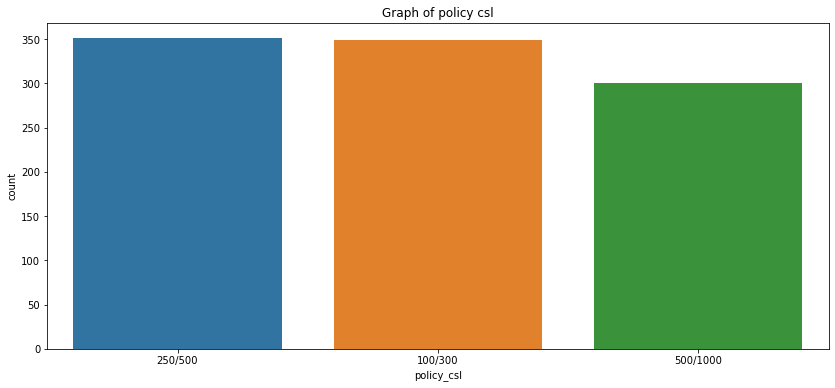

In [19]:
print('Count of policies csl:\n ',df['policy_csl'].value_counts())

plt.figure(figsize=(14,6))
sns.countplot(df['policy_csl'])
plt.title('Graph of policy csl')
plt.show()

Count of policy_deductable:
  1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


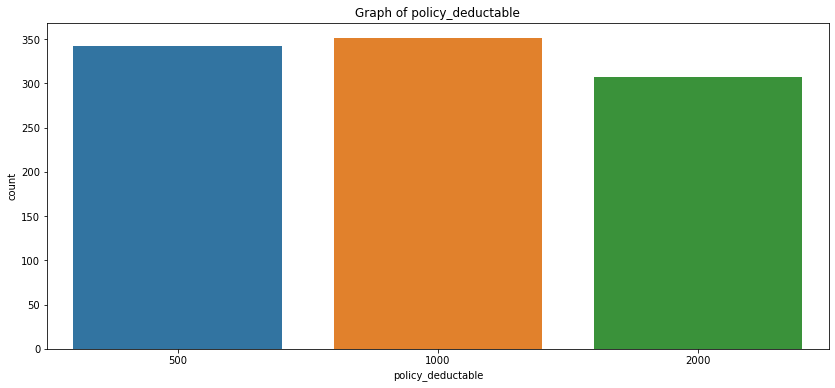

In [20]:
print('Count of policy_deductable:\n ',df['policy_deductable'].value_counts())

plt.figure(figsize=(14,6))
sns.countplot(df['policy_deductable'])
plt.title('Graph of policy_deductable')
plt.show()

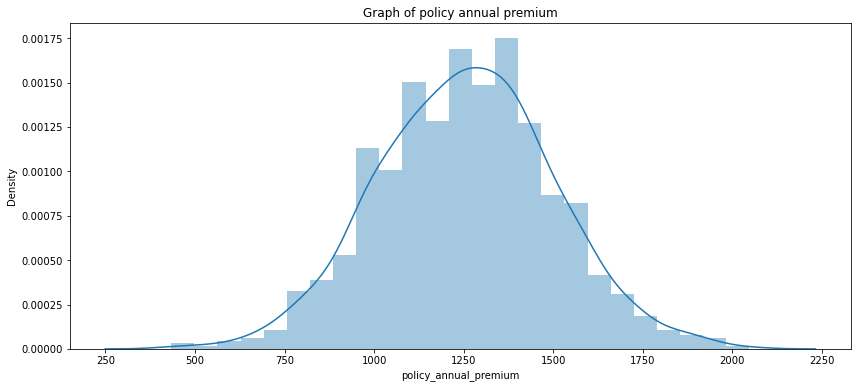

In [22]:
plt.figure(figsize=(14,6))
sns.distplot(df['policy_annual_premium'])
plt.title('Graph of policy annual premium')
plt.show()

Count of umbrella limit:
   0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


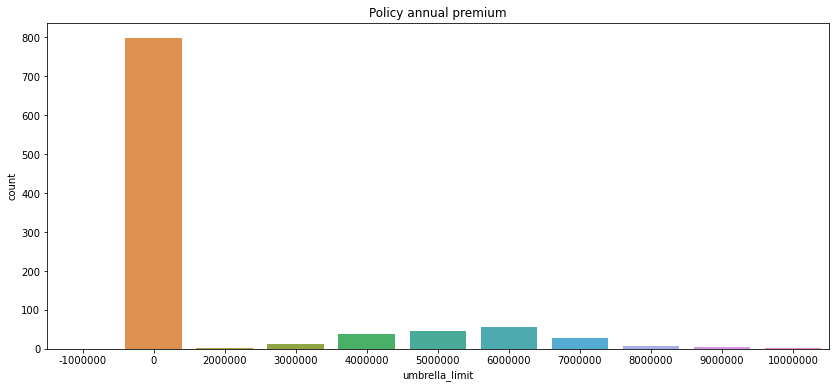

In [23]:
print('Count of umbrella limit:\n ',df['umbrella_limit'].value_counts())

plt.figure(figsize=(14,6))
sns.countplot(df['umbrella_limit'])
plt.title('Policy annual premium')
plt.show()

Count of insured_sex:
  FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


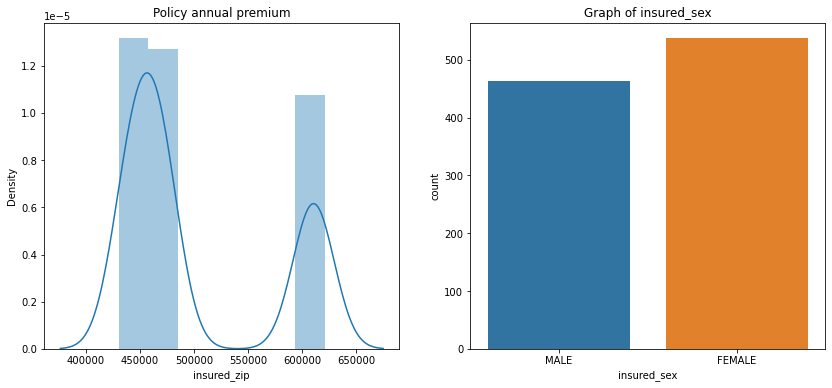

In [24]:
print('Count of insured_sex:\n ',df['insured_sex'].value_counts())
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.distplot(df['insured_zip'])
plt.title('Policy annual premium')
ax = plt.subplot(1,2,2)
sns.countplot(df['insured_sex'])
plt.title('Graph of insured_sex')

plt.show()

## Observations:
1. Most of people who claimed insutance had an average of 30-50.

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

2. Policy state and policy csl are equally distributed.
3. Nearly 35% of people choose premium of 1000, and 34% choose 500 and 31% choose for 2000
4. Annual premium policy has mean of around 1250. 
5. There are 55% of female and 45% of male who were insured.

Count of insured_education_level:
  JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
Count of insured_occupation:
  machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


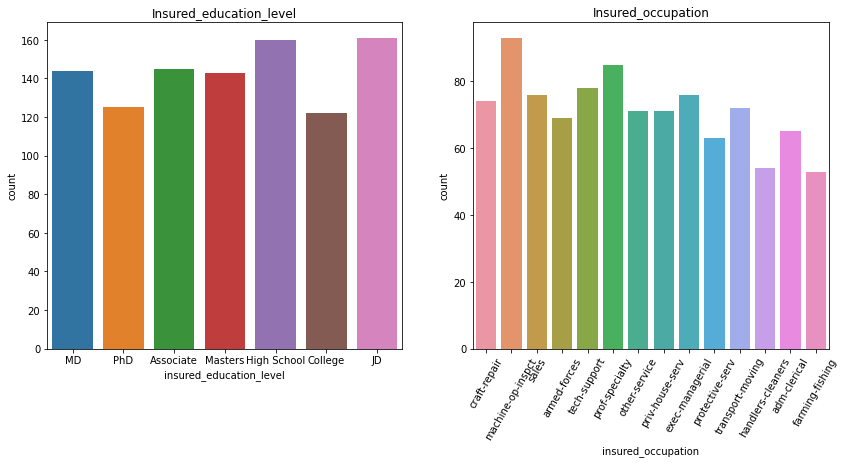

In [25]:
print('Count of insured_education_level:\n ',df['insured_education_level'].value_counts())
print('Count of insured_occupation:\n ',df['insured_occupation'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['insured_education_level'])
plt.title('Insured_education_level')
ax = plt.subplot(1,2,2)
sns.countplot(df['insured_occupation'])
plt.title('Insured_occupation')
plt.xticks(rotation=60)

plt.show()

Count of insured_hobbies:
  reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
Count of insured_relationship:
  own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


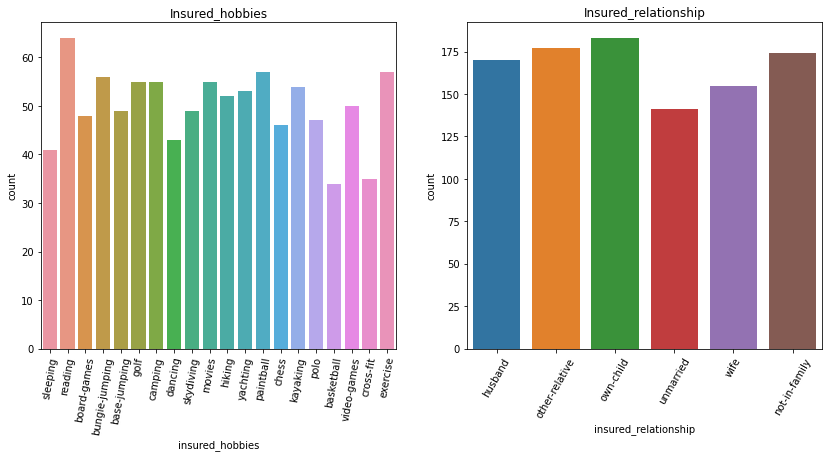

In [26]:
print('Count of insured_hobbies:\n ',df['insured_hobbies'].value_counts())
print('Count of insured_relationship:\n ',df['insured_relationship'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=80)
plt.title('Insured_hobbies')
ax = plt.subplot(1,2,2)
sns.countplot(df['insured_relationship'])
plt.title('Insured_relationship')
plt.xticks(rotation=60)

plt.show()

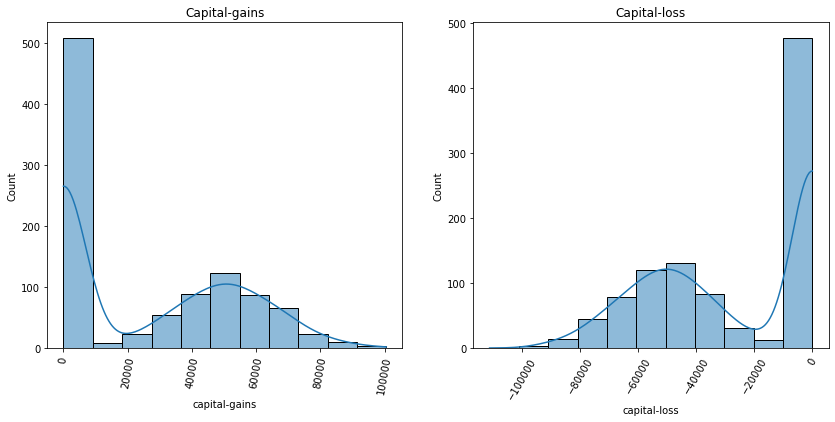

In [27]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.histplot(df['capital-gains'], kde=True)
plt.xticks(rotation=80)
plt.title('Capital-gains')
ax = plt.subplot(1,2,2)
sns.histplot(df['capital-loss'], kde=True)
plt.title('Capital-loss')
plt.xticks(rotation=60)

plt.show()

Count of collision_type:
  Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Count of incident_type:
  Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


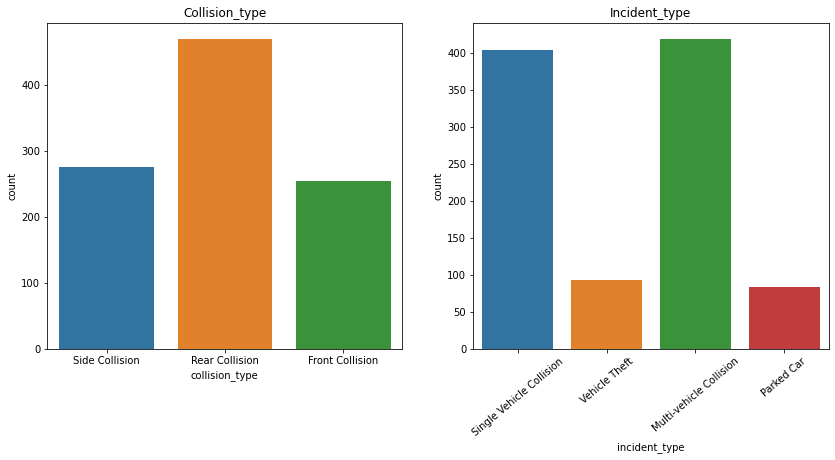

In [28]:
print('Count of collision_type:\n ',df['collision_type'].value_counts())
print('Count of incident_type:\n ',df['incident_type'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['collision_type'])

plt.title('Collision_type')
ax = plt.subplot(1,2,2)
sns.countplot(df['incident_type'])
plt.xticks(rotation=40)
plt.title('Incident_type')


plt.show()

Count of incident_severity:
  Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
Count of authorities_contacted:
  Police       383
Fire         223
Other        198
Ambulance    196
Name: authorities_contacted, dtype: int64


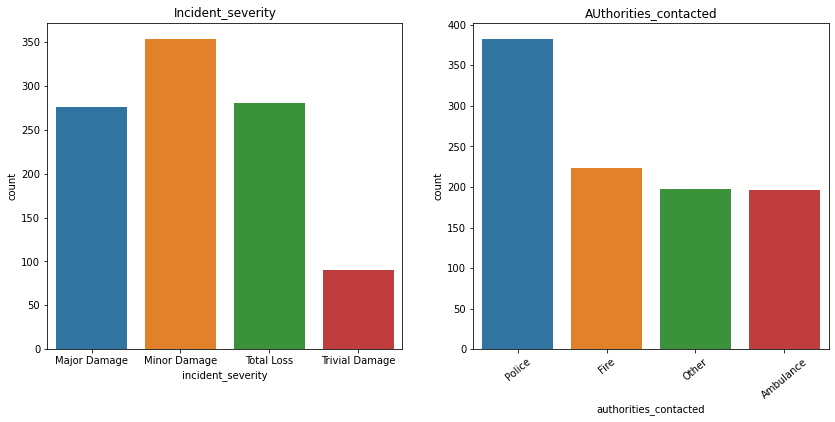

In [29]:
print('Count of incident_severity:\n ',df['incident_severity'].value_counts())
print('Count of authorities_contacted:\n ',df['authorities_contacted'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['incident_severity'])
plt.title('Incident_severity')

ax = plt.subplot(1,2,2)
sns.countplot(df['authorities_contacted'])
plt.xticks(rotation=40)
plt.title('AUthorities_contacted')


plt.show()

Count of incident_state:
  NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
Count of incident_city:
  Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


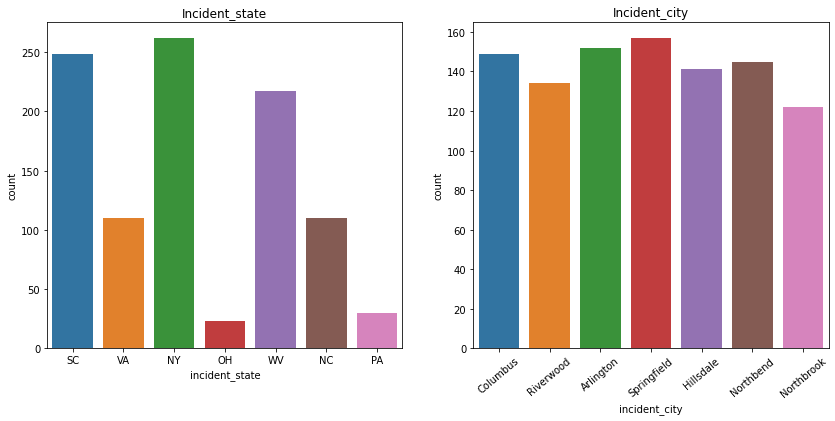

In [30]:
print('Count of incident_state:\n ',df['incident_state'].value_counts())
print('Count of incident_city:\n ',df['incident_city'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['incident_state'])
plt.title('Incident_state')

ax = plt.subplot(1,2,2)
sns.countplot(df['incident_city'])
plt.xticks(rotation=40)
plt.title('Incident_city')

plt.show()

Count of incident_city:
  Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


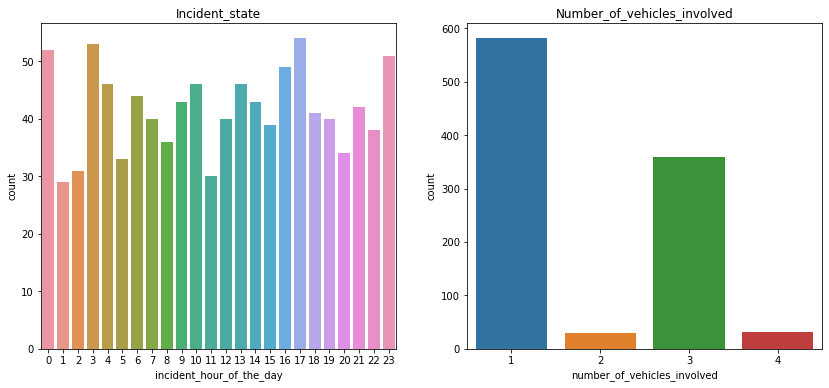

In [31]:
print('Count of incident_city:\n ',df['incident_city'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['incident_hour_of_the_day'])
plt.title('Incident_state')

ax = plt.subplot(1,2,2)
sns.countplot(df['number_of_vehicles_involved'])
plt.title('Number_of_vehicles_involved')


plt.show()

## Observations:
1. It can be seen that all those who have insured were with JD and then high school.
2. People working as machine op inspect had insured in highest number, people in various occupation have insurance.
3. Insured hobbies has no impact on fraudulent analysis.
4. People with own-child and then not-in family were the highest among insured.
5. Highest number of people were having nil Capital gains or capital loss.
6. Rear collission type was highest type of collision which was claimed.
7. Single and multi-vehile collision contributed most among the type fo incident.
8. Most of accidents had minor damages and highest number of times police was the contacted authority.
9. Incident is normally distributed over different cities where Springfield had seen highest number of cases, and NY state seen highest incidents.
10. Most of the incidents had only 1 number of vehicle involved.

Count of property_damage:
  NO     698
YES    302
Name: property_damage, dtype: int64
Count of bodily_injuries:
  0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


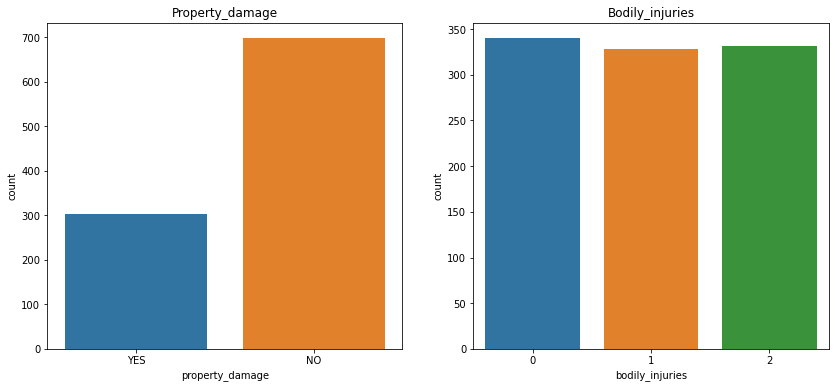

In [32]:
print('Count of property_damage:\n ',df['property_damage'].value_counts())
print('Count of bodily_injuries:\n ',df['bodily_injuries'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['property_damage'])
plt.title('Property_damage')

ax = plt.subplot(1,2,2)
sns.countplot(df['bodily_injuries'])
plt.title('Bodily_injuries')


plt.show()

Count of witnesses:
  1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
Count of police_report_available:
  NO     686
YES    314
Name: police_report_available, dtype: int64


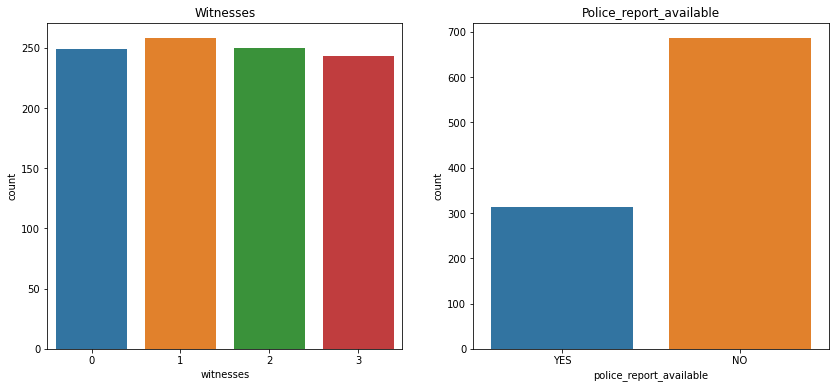

In [33]:
print('Count of witnesses:\n ',df['witnesses'].value_counts())
print('Count of police_report_available:\n ',df['police_report_available'].value_counts())

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['witnesses'])
plt.title('Witnesses')

ax = plt.subplot(1,2,2)
sns.countplot(df['police_report_available'])
plt.title('Police_report_available')


plt.show()

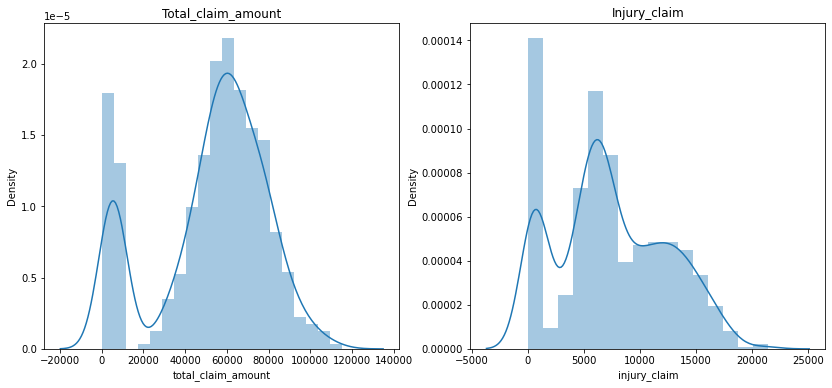

In [34]:
plt.figure(figsize=(14,6), facecolor='white')

ax = plt.subplot(1,2,1)
sns.distplot(df['total_claim_amount'])
plt.title('Total_claim_amount')

ax = plt.subplot(1,2,2)
sns.distplot(df['injury_claim'])
plt.title('Injury_claim')


plt.show()

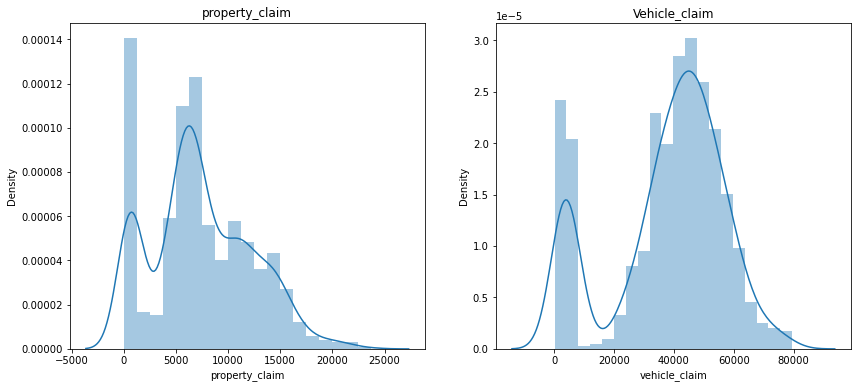

In [35]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
sns.distplot(df['property_claim'])
plt.title('property_claim')

ax = plt.subplot(1,2,2)
sns.distplot(df['vehicle_claim'])
plt.title('Vehicle_claim')


plt.show()

Count of auto_make:
  Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
Count of auto_model:
  RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV            

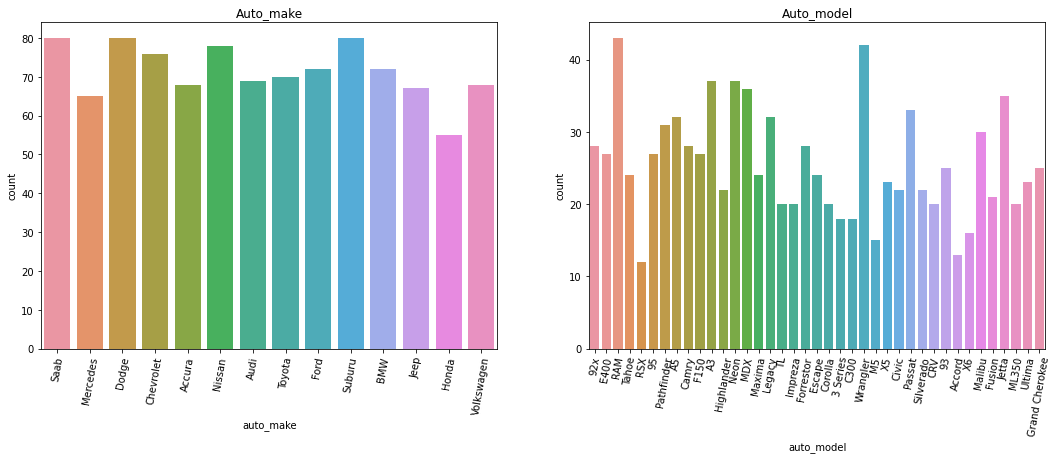

In [37]:
print('Count of auto_make:\n ',df['auto_make'].value_counts())
print('Count of auto_model:\n ',df['auto_model'].value_counts())

plt.figure(figsize=(18,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['auto_make'])
plt.xticks(rotation=80)
plt.title('Auto_make')

ax = plt.subplot(1,2,2)
sns.countplot(df['auto_model'])
plt.xticks(rotation=80)
plt.title('Auto_model')


plt.show()

Count of auto_year:
  1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64
Count of fraud_reported:
  N    753
Y    247
Name: fraud_reported, dtype: int64


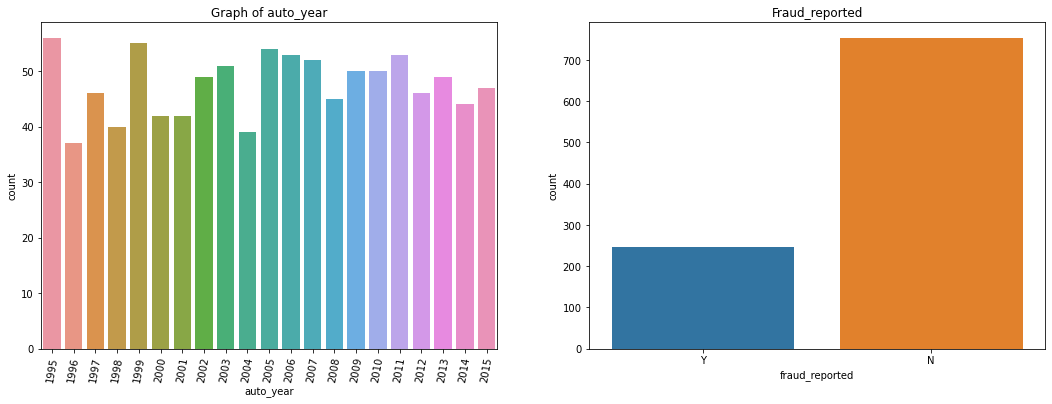

In [38]:
print('Count of auto_year:\n ',df['auto_year'].value_counts())
print('Count of fraud_reported:\n ',df['fraud_reported'].value_counts())

plt.figure(figsize=(18,6))

ax = plt.subplot(1,2,1)
sns.countplot(df['auto_year'])
plt.xticks(rotation=80)
plt.title('Graph of auto_year')

ax = plt.subplot(1,2,2)
sns.countplot(df['fraud_reported'])
plt.title('Fraud_reported')


plt.show()

#### Observation:

1. In most of the incident happened, no property damage was occured.
2. Most of incidents there were 0 bodily injuries, but equally there were 1/2 injuries.
3. 70% of the incident registered didnot have the police reports.
4. Claims seems normally distributed, but most of the times no claims were observed.
5. Incidents reported had highest number of RAM, and Wrangler auto model.
6. The fraud reported attribute has 25% of Yes and 75% No, which is having unbalanced set. Hence need to be treated.

### Bi-variate Analysis.

Let us analyse how the attributes vary w.r.t the target variable.

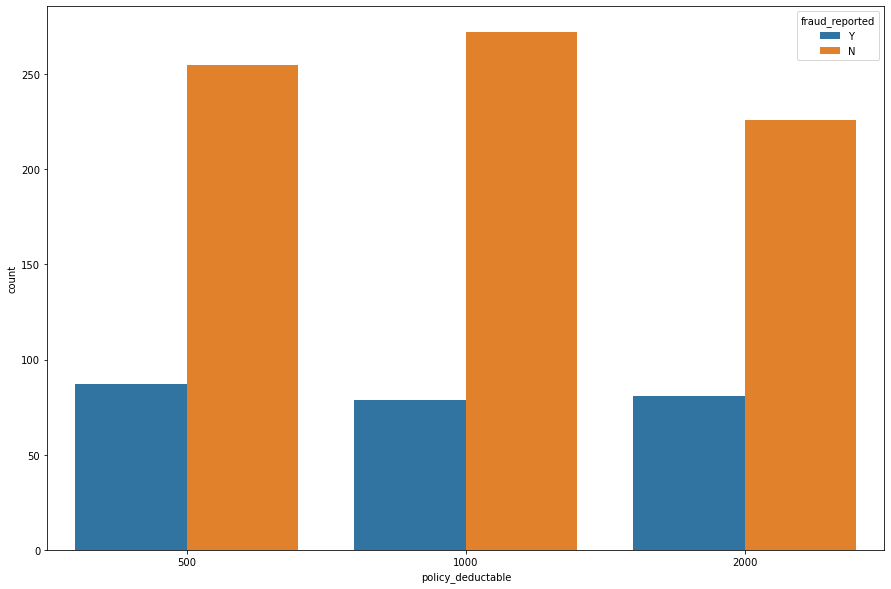

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['policy_deductable'],hue=df['fraud_reported'])
plt.show()

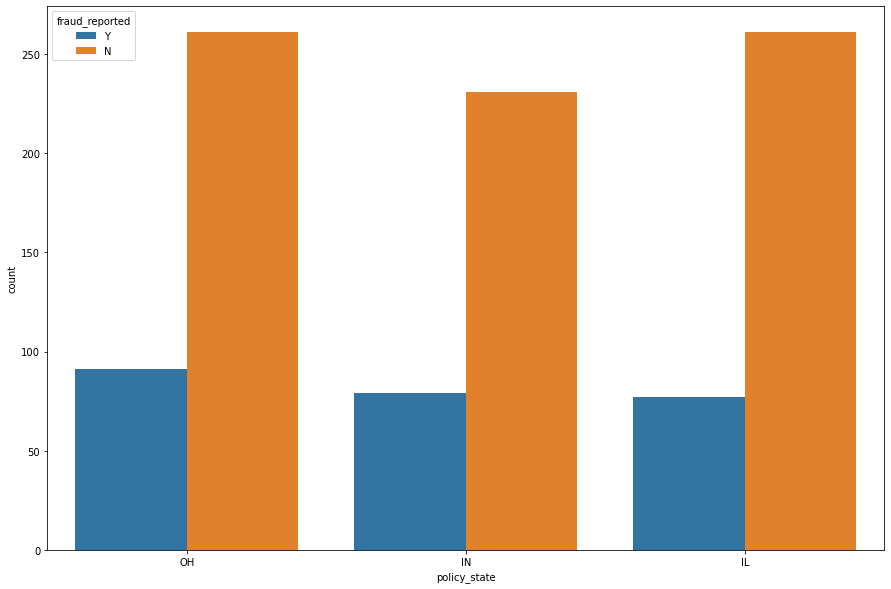

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['policy_state'],hue=df['fraud_reported'])
plt.show()

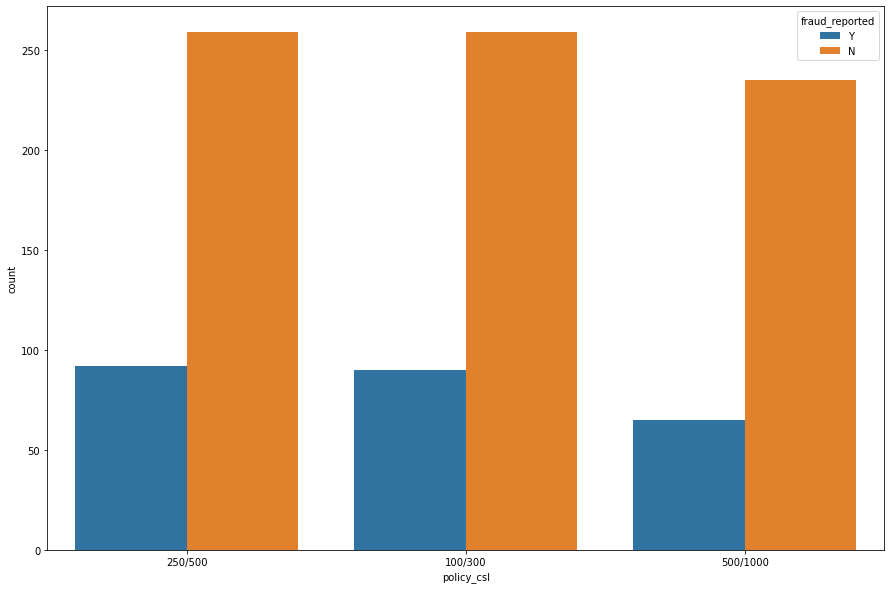

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['policy_csl'],hue=df['fraud_reported'])
plt.show()

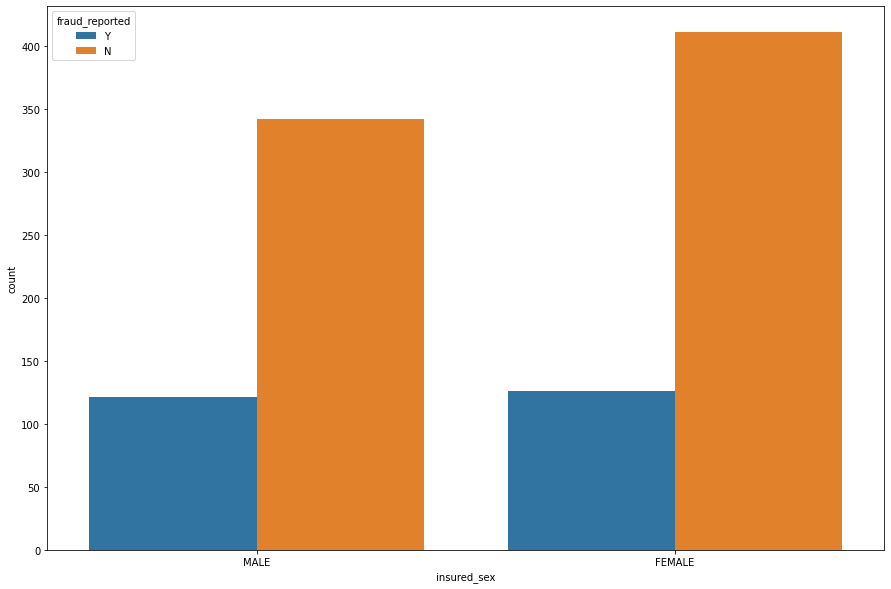

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'])
plt.show()

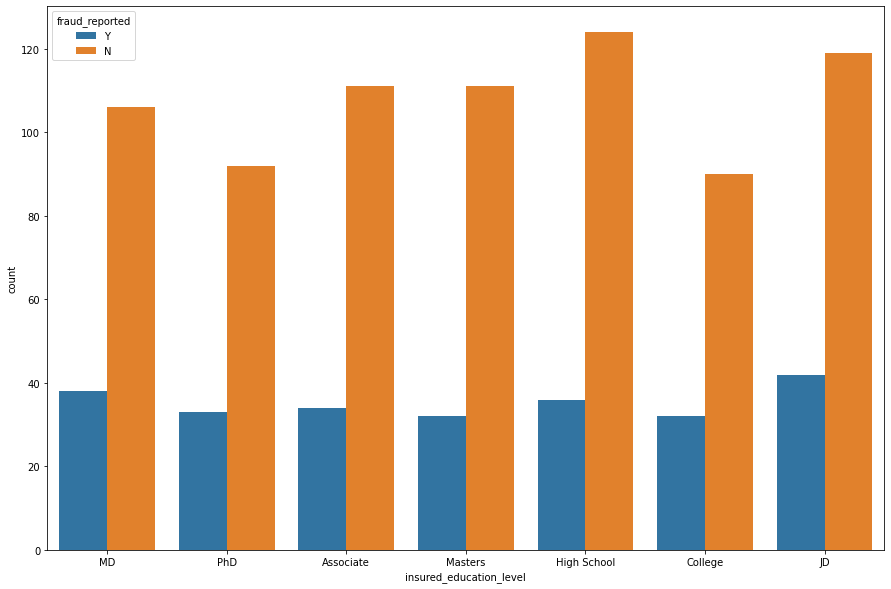

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'])
plt.show()

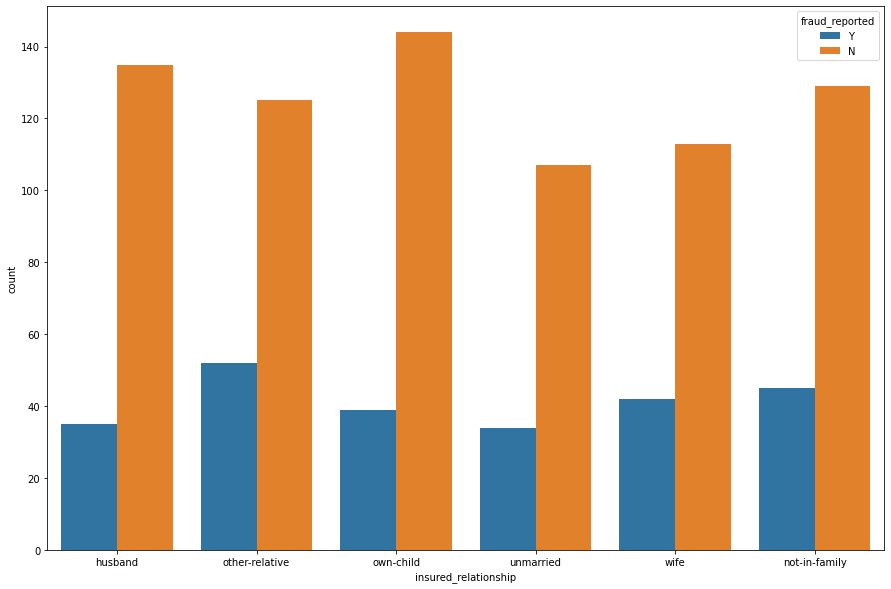

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['insured_relationship'],hue=df['fraud_reported'])
plt.show()

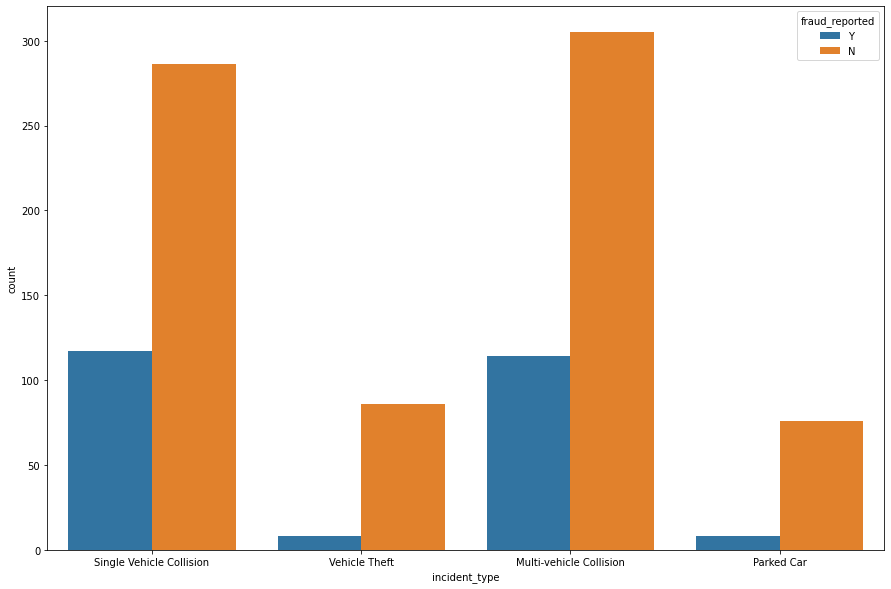

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['incident_type'],hue=df['fraud_reported'])
plt.show()

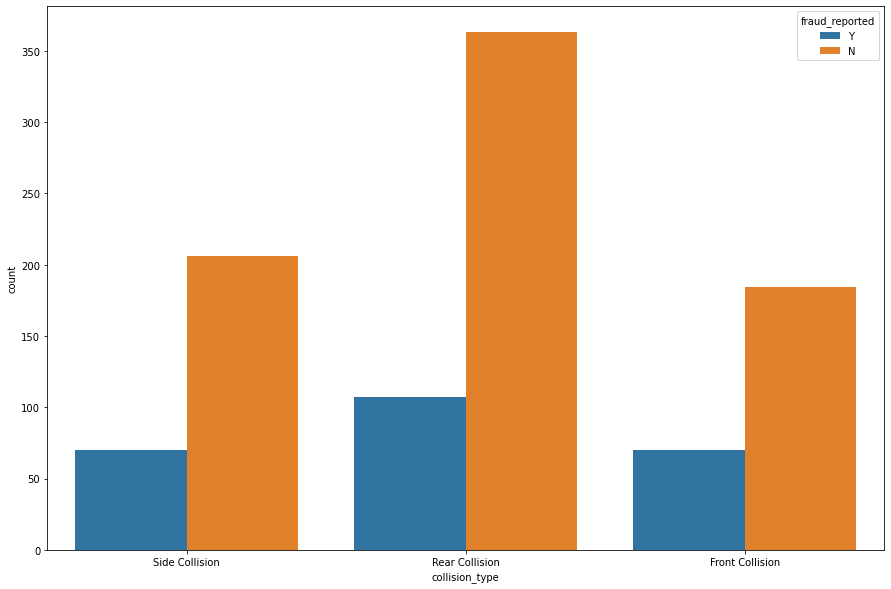

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['collision_type'],hue=df['fraud_reported'])
plt.show()

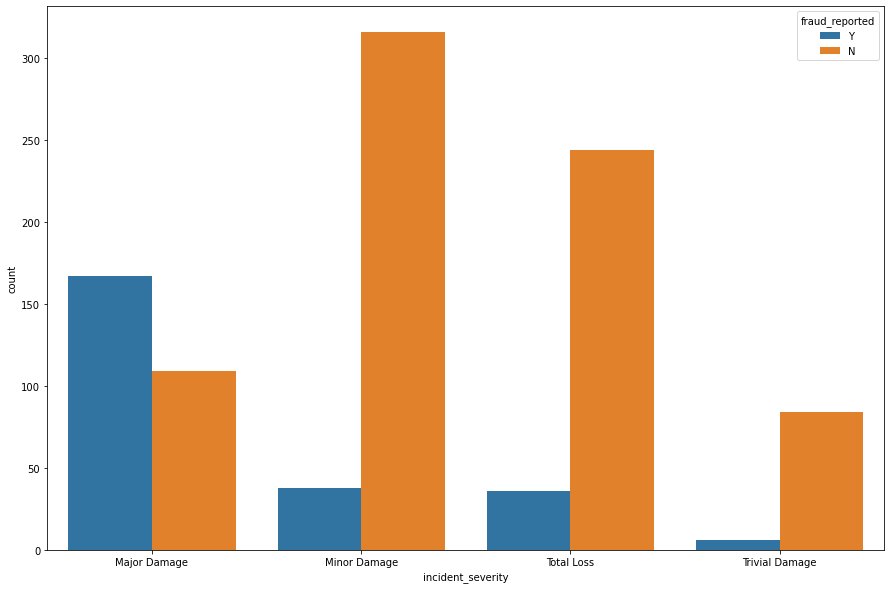

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'])
plt.show()

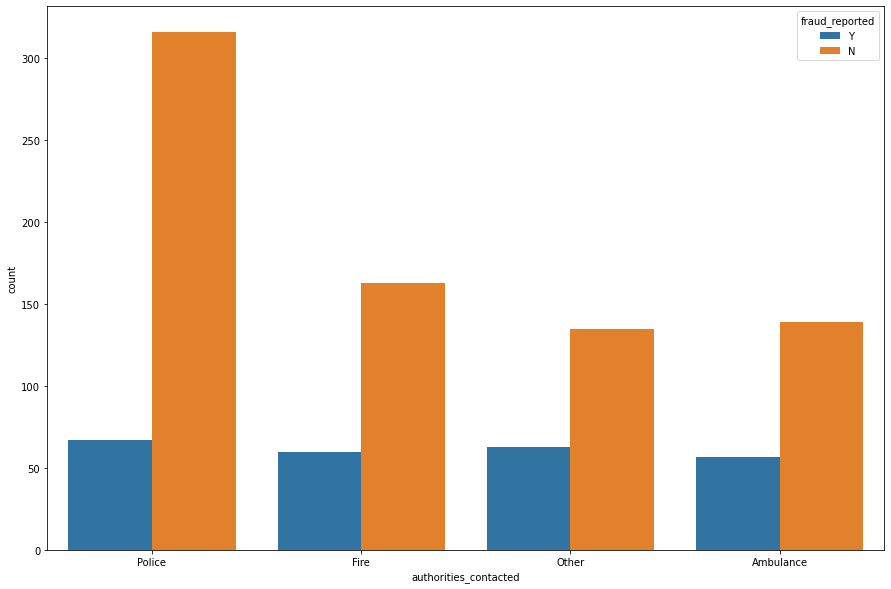

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['authorities_contacted'],hue=df['fraud_reported'])
plt.show()

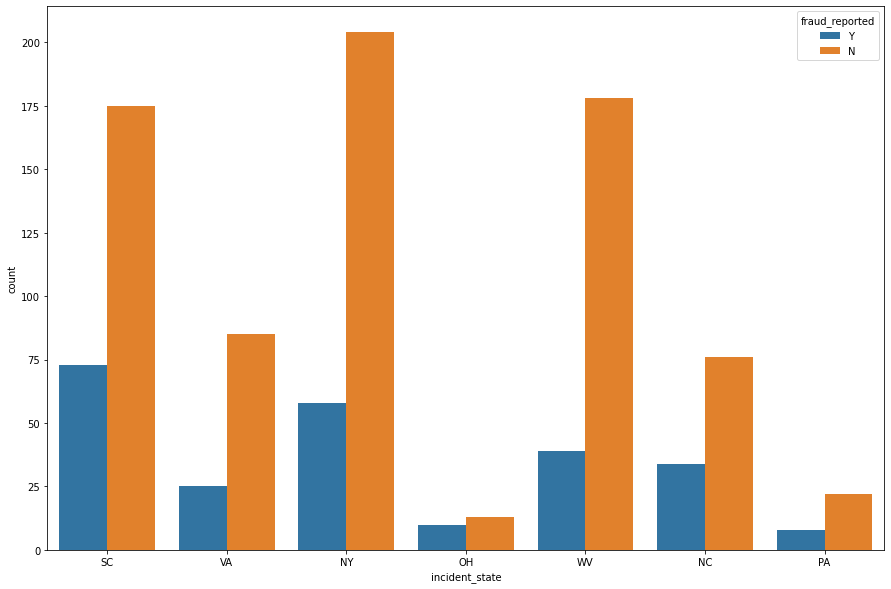

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['incident_state'],hue=df['fraud_reported'])
plt.show()

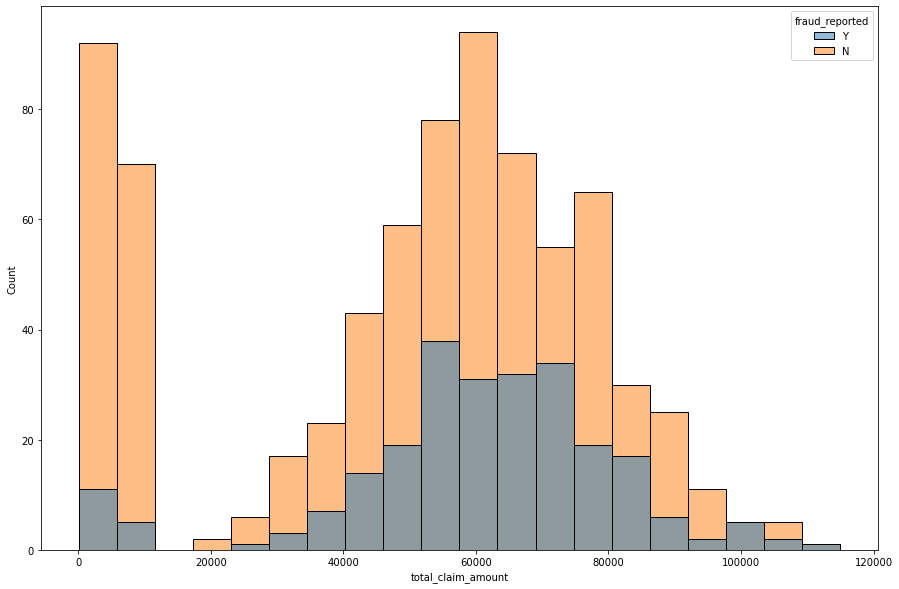

In [50]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['total_claim_amount'],hue=df['fraud_reported'])
plt.show()

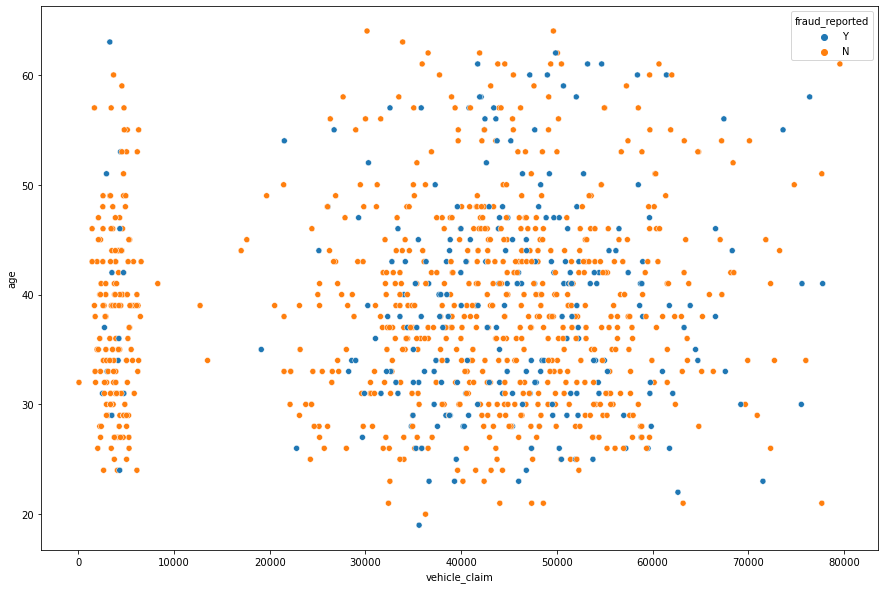

In [51]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['vehicle_claim'],y = df['age'],hue=df['fraud_reported'])
plt.show()

<Figure size 1080x720 with 0 Axes>

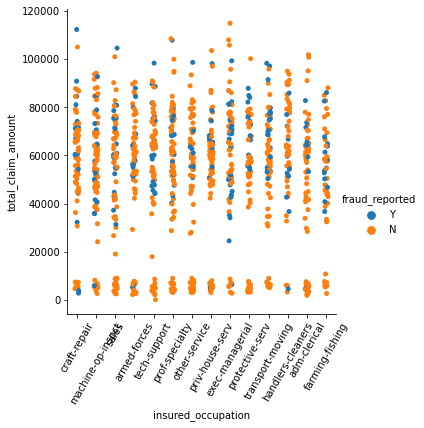

In [52]:
plt.figure(figsize=(15,10))
sns.catplot(y='total_claim_amount',x='insured_occupation',hue='fraud_reported', data=df)
plt.xticks(rotation=60)
plt.show()

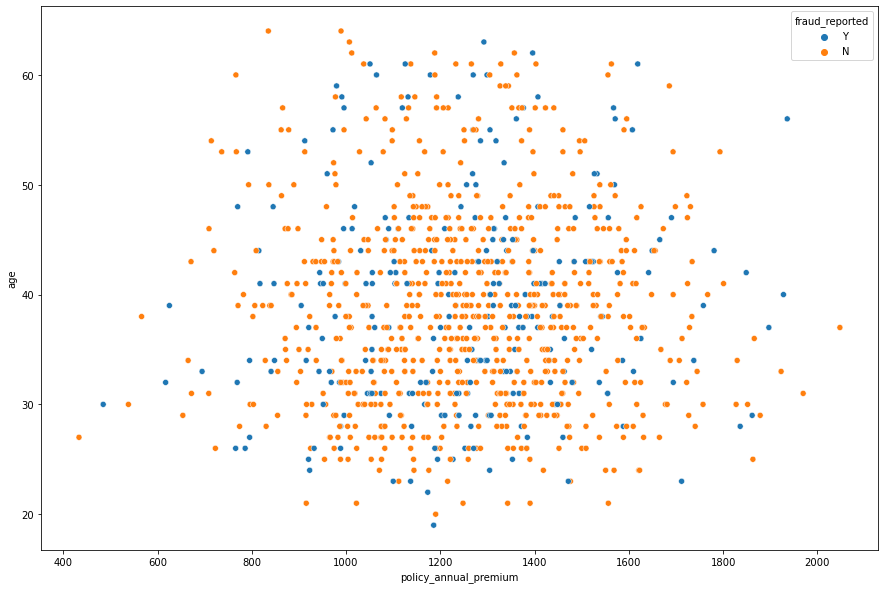

In [53]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['policy_annual_premium'],y = df['age'],hue=df['fraud_reported'])
plt.show()

<Figure size 1080x720 with 0 Axes>

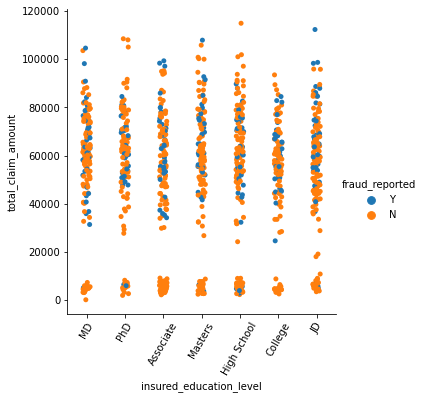

In [54]:
plt.figure(figsize=(15,10))
sns.catplot(y='total_claim_amount',x='insured_education_level',hue='fraud_reported', data=df)
plt.xticks(rotation=60)
plt.show()

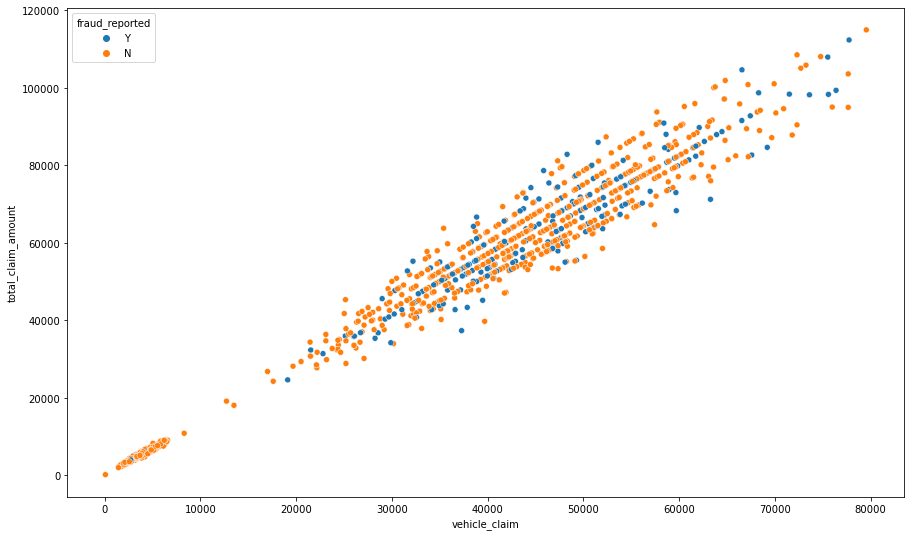

In [55]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='vehicle_claim', y='total_claim_amount',hue='fraud_reported',data=df)
plt.show()

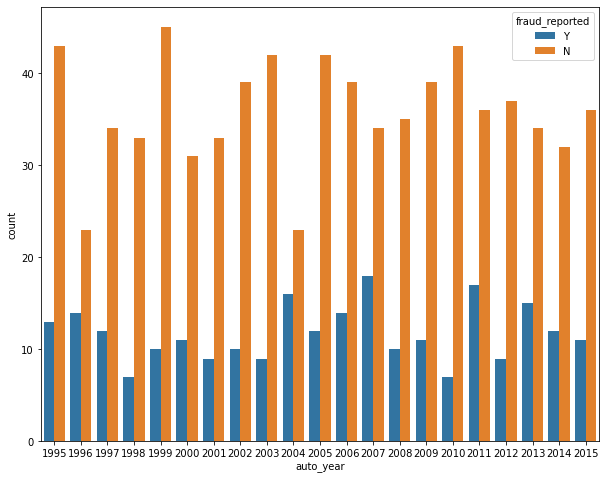

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])
plt.show()

## Observations:
1. We see that fraudulent claims are equally seen in all the types of deductables.
2. When policy is OH state the frauds reported are slight high.
3. Equal number of frauds in both male and female.
4. Highest frauds oberved in people with education level of MD or JD.
5. Frauds are seen with insured people's are not having family relation or having other relation.
6. Highest frauds observed in single and multicollision incident type.
7. Rear collision seems to have more frauds.
8. When incident severity claimed to be with major damages, then there is high chance of fradulent insurance claims seen then any other severity type.
9. SC state has seen highest number of fraud clains and PA with lowest number of fraudlent claim.
10. Most of times people have not claimed total amount.
11. Vehicle claim and Total claim has linear relation
12. Number of fradulent claims were less in 1998 and 2010 and then it has nearly increasing.

## Feature Selection

<Figure size 1440x1440 with 0 Axes>

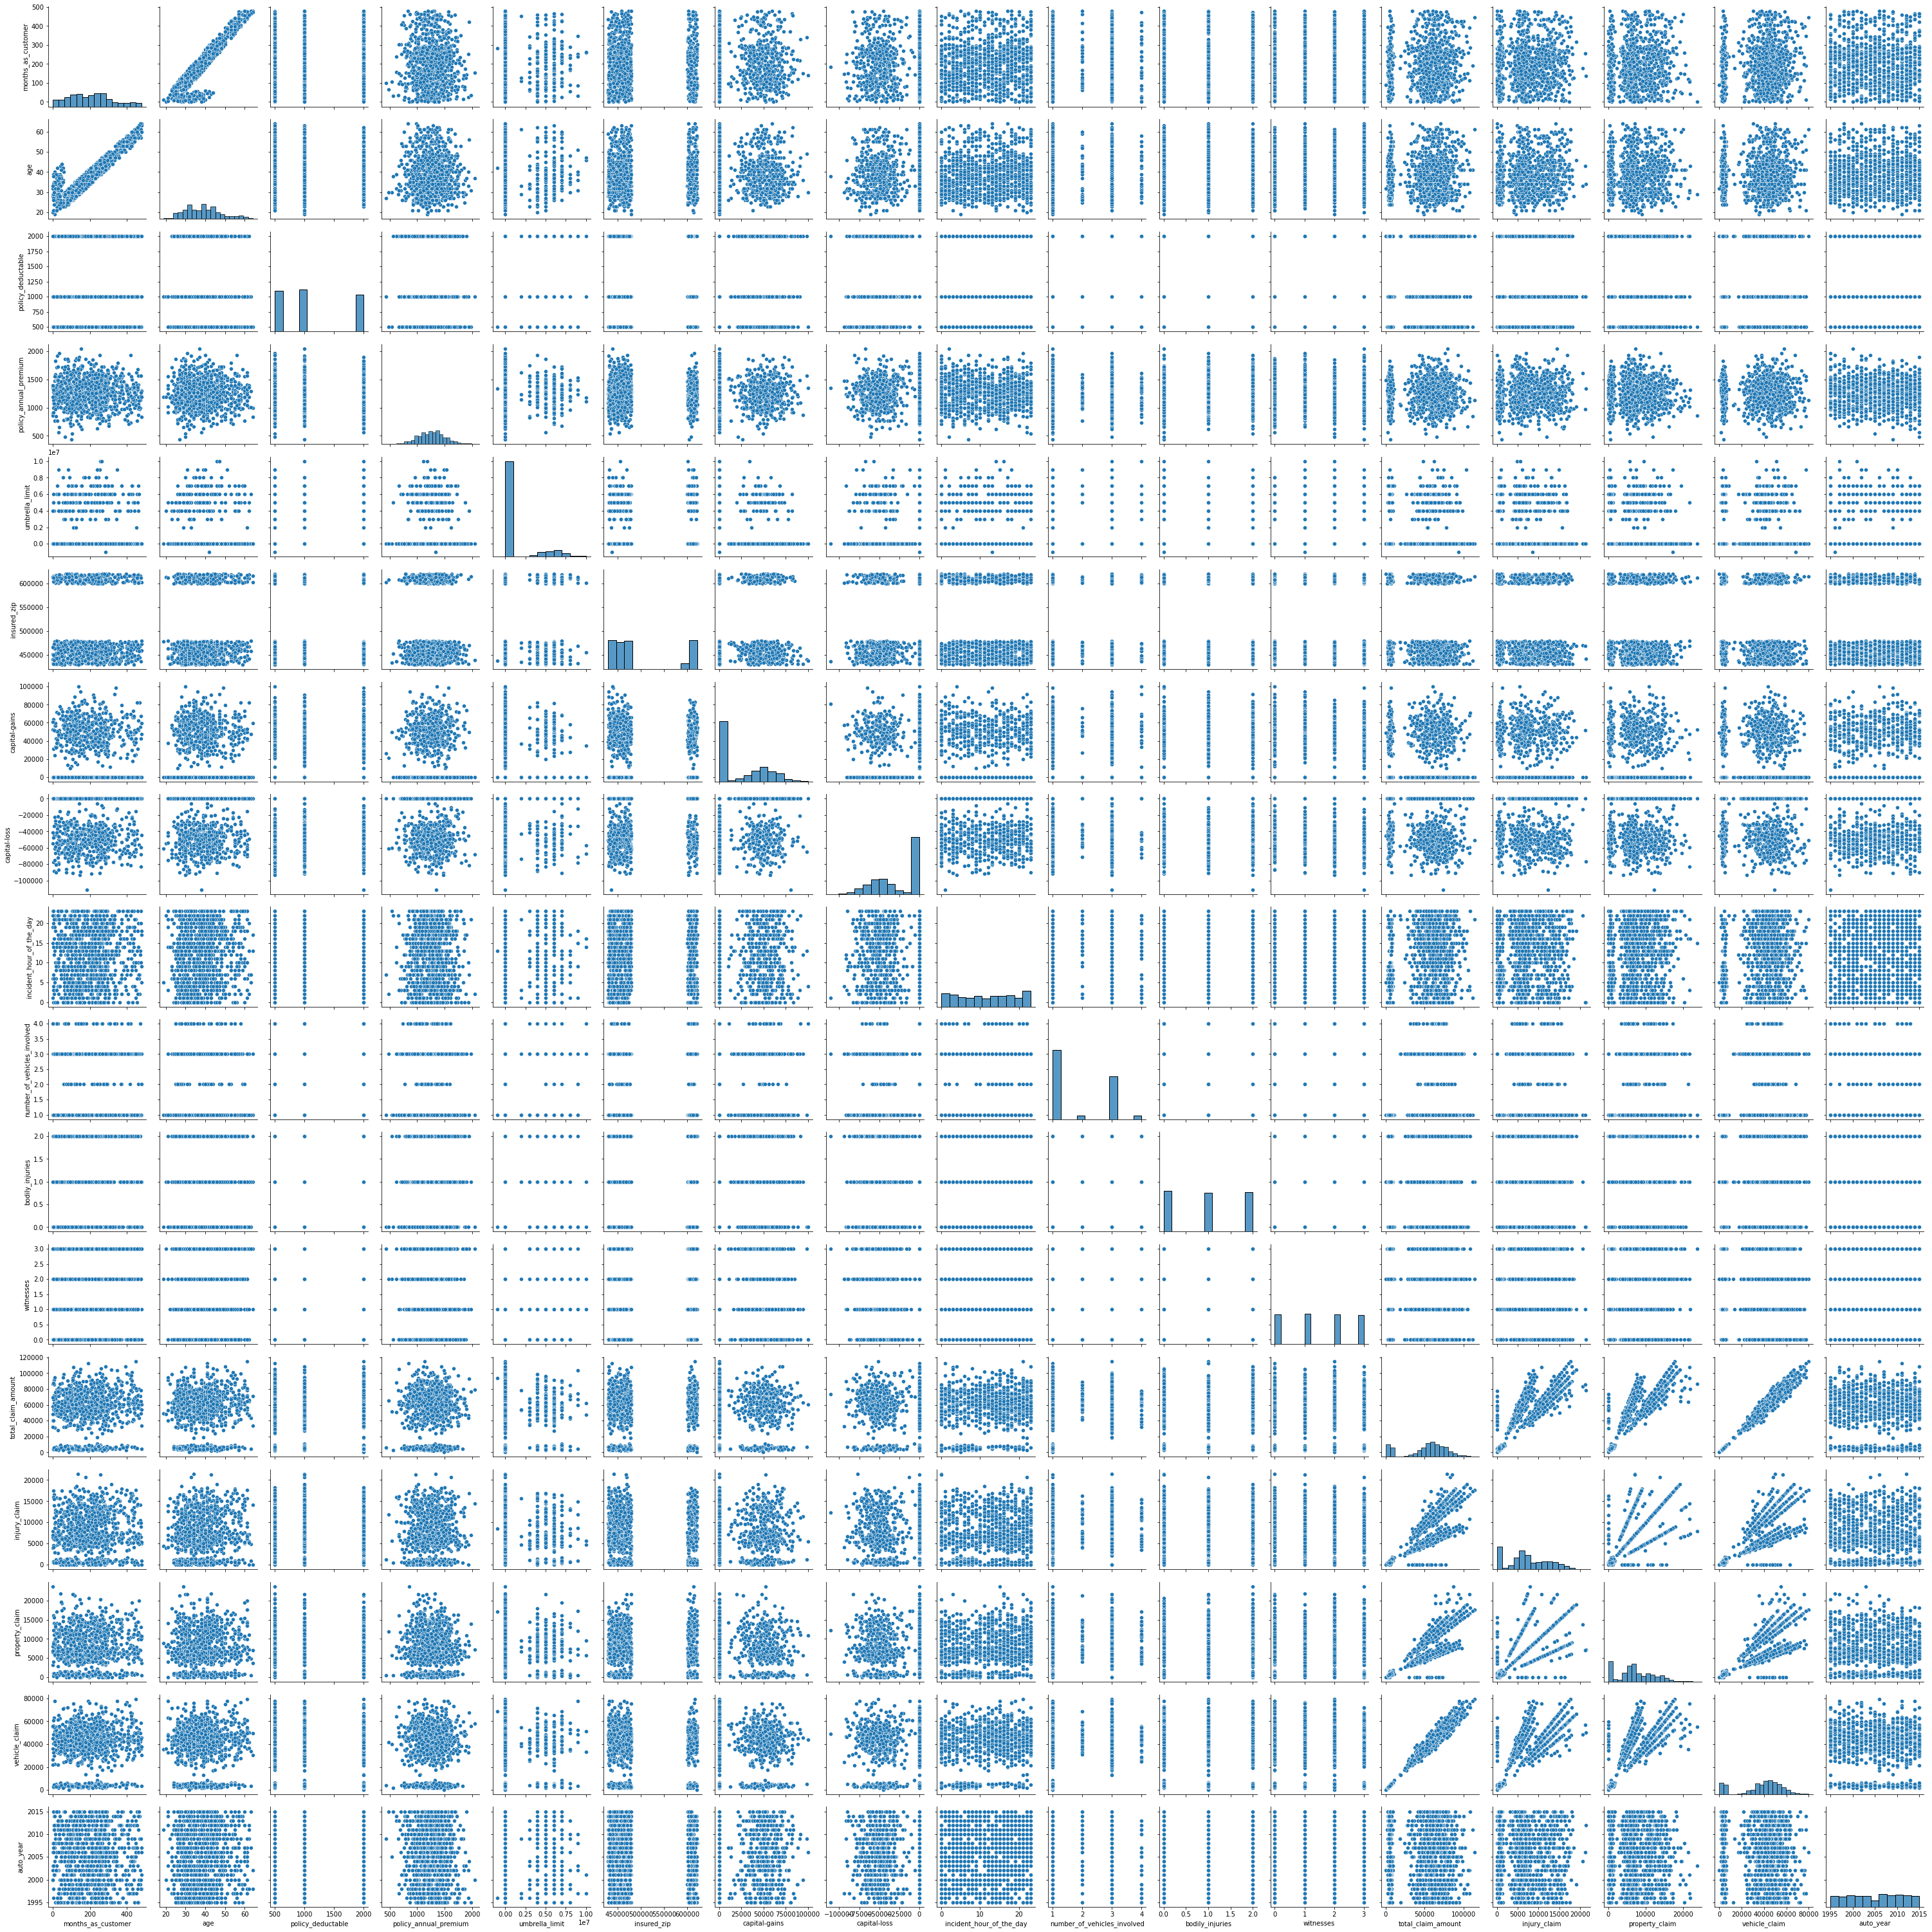

In [57]:
plt.figure(figsize= (20,20))
sns.pairplot(data= df)
plt.show()

#### Let us take the columns which are not that insightful and modify them which provides good insight for the data analysis.

#### Using the auto_year to bring the age of car



In [58]:
df['Auto_Age'] = 2022-df['auto_year']
df['Auto_Age']

0      18
1      15
2      15
3       8
4      13
       ..
995    16
996     7
997    26
998    24
999    15
Name: Auto_Age, Length: 1000, dtype: int64

In [59]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
property_damage
police_report_available
auto_make
auto_model
fraud_reported


### We are having 18 categorical columns which need to be treated.
1. Let us use dummy insertion for the columns policy_csl,policy_state,collision_type,authorities_contacted
2. We will label encode the attributes with ordinal data.
3. We will replace Male, Yes,Y by 1 and Female, No , N by 0 as per our convenience.


In [60]:
#let us replace the following columns using get dummies
df=pd.get_dummies(columns=['policy_csl','policy_state','collision_type','authorities_contacted'], data=df,drop_first=True)

#replacing the categorical values of following columns into numericals
df['insured_sex'].replace({'MALE':1,'FEMALE':0},inplace=True)
df['incident_severity'].replace({'Major Damage':2, 'Minor Damage':0, 'Total Loss':3, 'Trivial Damage':1},inplace=True)
df['property_damage'].replace({'YES':1,'NO':0},inplace=True)
df['police_report_available'].replace({'YES':1,'NO':0},inplace=True)
df['fraud_reported'].replace({'Y':1,'N':0},inplace=True)

In [61]:
#Label encoding following columns
col = ['insured_education_level','insured_occupation','insured_relationship','auto_model','incident_type','incident_state','incident_city','auto_make']
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df[col]= df[col].apply(lab_enc.fit_transform)

In [62]:
#Let us drop the  columns which are not relavent for the analysis.
df.drop(columns=['months_as_customer','incident_date','auto_year','incident_hour_of_the_day','auto_year','insured_hobbies','umbrella_limit'],inplace = True)

In [63]:
df.dtypes

age                                int64
policy_deductable                  int64
policy_annual_premium            float64
insured_zip                        int64
insured_sex                        int64
insured_education_level            int32
insured_occupation                 int32
insured_relationship               int32
capital-gains                      int64
capital-loss                       int64
incident_type                      int32
incident_severity                  int64
incident_state                     int32
incident_city                      int32
number_of_vehicles_involved        int64
property_damage                    int64
bodily_injuries                    int64
witnesses                          int64
police_report_available            int64
total_claim_amount                 int64
injury_claim                       int64
property_claim                     int64
vehicle_claim                      int64
auto_make                          int32
auto_model      

### Correlation of the attributes with target variables.

#### The attributes are sorted in accending order of the correlation and visualized in form of bar plot.

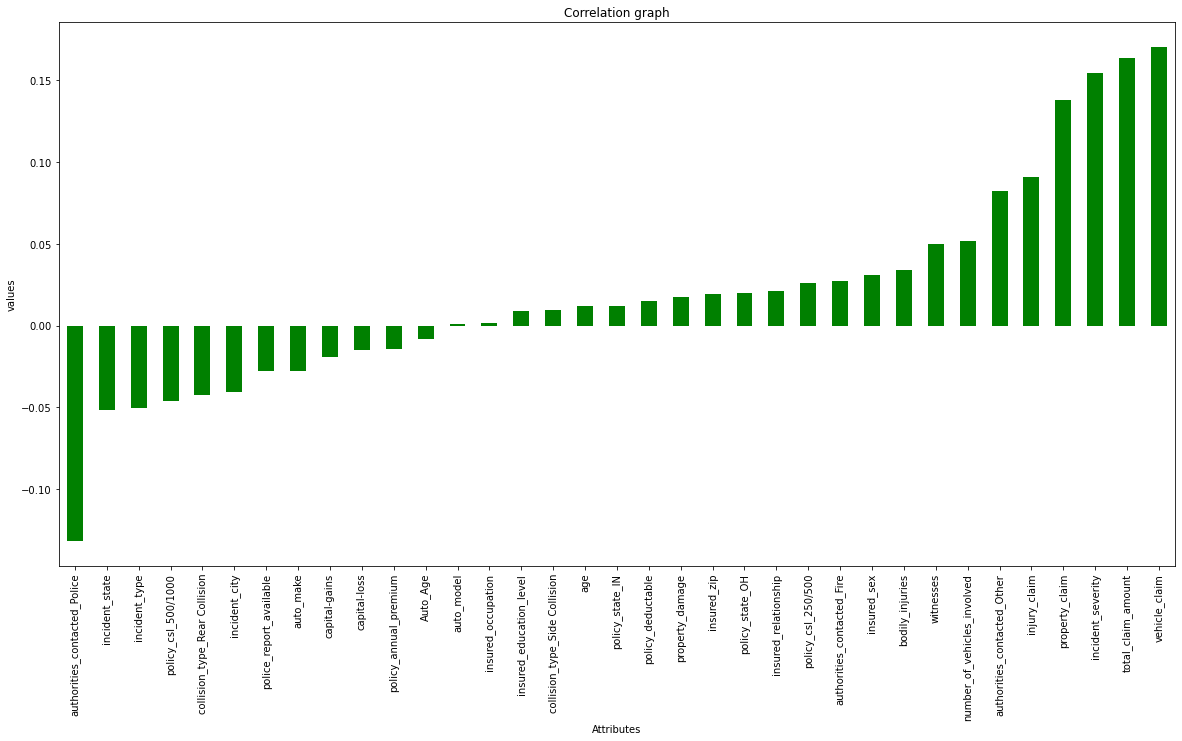

In [64]:
plt.figure(figsize=(20,10))
df.corr()['fraud_reported'].sort_values().drop(['fraud_reported']).plot(kind='bar',color='g')
plt.xlabel('Attributes')
plt.ylabel('values')
plt.title('Correlation graph')
plt.show()

## Feature splitting

### Let us seperate the attributes and Target variables for further analysis.

#### As the target variable is having unbalanced data set, we are treating this column with Minority Oversampling technique

In [65]:
X =  df.drop(columns='fraud_reported')
y = df['fraud_reported']

In [66]:
smo = SMOTE()
print('Number of rows and columns before resampling:', X.shape, y.shape)
X, y = smo.fit_resample(X,y)
print('Number of rows and columns after resampling:', X.shape, y.shape)

Number of rows and columns before resampling: (1000, 35) (1000,)
Number of rows and columns after resampling: (1506, 35) (1506,)


### Let us check the correlation between the attributes using heat map

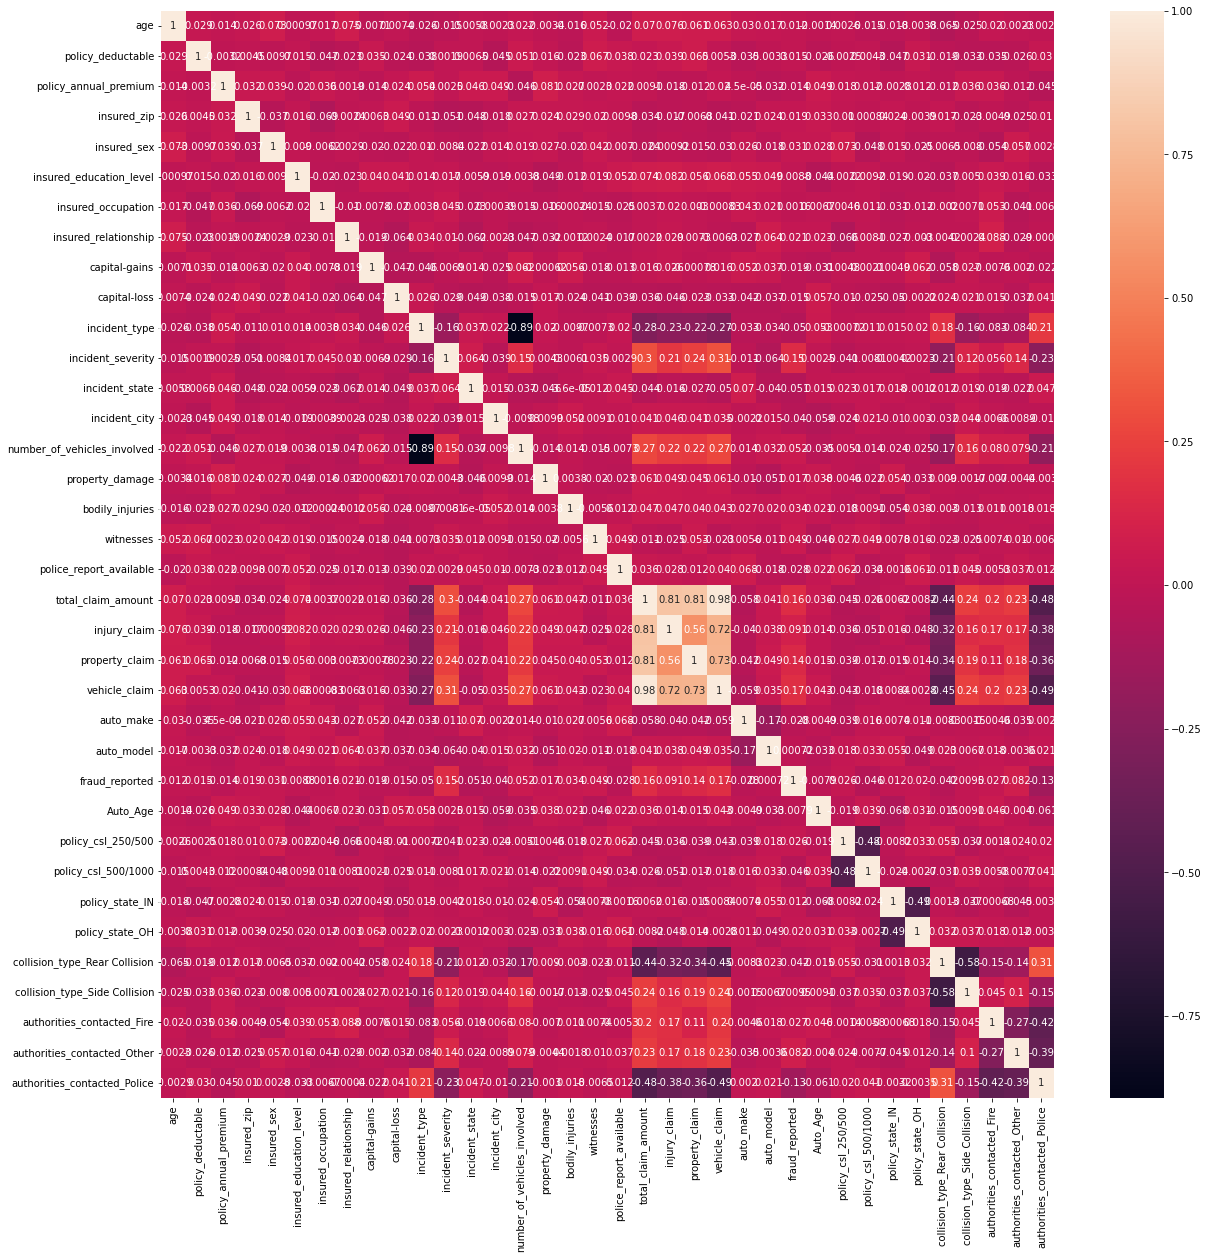

In [67]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

### We see that total_claim,injury claim, property claim, vehicle claims are too much correlated. Let us remove total claim in column. Then check the correlation using Varianace Inflation Factor.

In [68]:
X.drop(columns=['property_claim', 'injury_claim', 'vehicle_claim'], inplace=True)

In [69]:
VIF = pd.DataFrame()
VIF["Features"] = X.columns
VIF["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

VIF

Features  VIF values
0                             age   19.575818
1               policy_deductable    5.044297
2           policy_annual_premium   27.337904
3                     insured_zip   36.635193
4                     insured_sex    1.757881
5         insured_education_level    3.575926
6              insured_occupation    3.957913
7            insured_relationship    3.253070
8                   capital-gains    1.868453
9                    capital-loss    2.024068
10                  incident_type    7.010631
11              incident_severity    3.401096
12                 incident_state    3.427108
13                  incident_city    3.160545
14    number_of_vehicles_involved   15.161869
15                property_damage    1.388966
16                bodily_injuries    2.432157
17                      witnesses    2.897697
18        police_report_available    1.420971
19             total_claim_amount    9.579649
20                      auto_make    3.848704
21                     auto_model    4.610127
22                       Auto_Age    9.674144
23             policy_csl_250/500    1.751521
24            policy_csl_500/1000    1.628265
25                policy_state_IN    1.636228
26                policy_state_OH    1.748386
27  collision_type_Rear Collision    2.646418
28  collision_type_Side Collision    1.715654
29     authorities_contacted_Fire    1.631230
30    authorities_contacted_Other    1.541582
31   authorities_contacted_Police    2.676722

### We see VIF score is too high for number_of_vehicles_involved, insured_zip

In [70]:
X.drop(columns=['insured_zip'], inplace=True)
VIF = pd.DataFrame()
VIF["Features"] = X.columns
VIF["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF

Features  VIF values
0                             age   18.591812
1               policy_deductable    4.954279
2           policy_annual_premium   24.192229
3                     insured_sex    1.740430
4         insured_education_level    3.564945
5              insured_occupation    3.955294
6            insured_relationship    3.251694
7                   capital-gains    1.868350
8                    capital-loss    2.024057
9                   incident_type    6.599875
10              incident_severity    3.401031
11                 incident_state    3.424614
12                  incident_city    3.158327
13    number_of_vehicles_involved   13.861640
14                property_damage    1.388067
15                bodily_injuries    2.420660
16                      witnesses    2.870450
17        police_report_available    1.417575
18             total_claim_amount    9.420763
19                      auto_make    3.815216
20                     auto_model    4.570630
21                       Auto_Age    9.331434
22             policy_csl_250/500    1.750346
23            policy_csl_500/1000    1.627667
24                policy_state_IN    1.635663
25                policy_state_OH    1.748229
26  collision_type_Rear Collision    2.636669
27  collision_type_Side Collision    1.715422
28     authorities_contacted_Fire    1.628758
29    authorities_contacted_Other    1.541386
30   authorities_contacted_Police    2.672545

In [71]:
# removing policy_annual_premium, age from the features to reduce VIF score

X.drop(columns=['policy_annual_premium', 'age'], inplace=True)
VIF = pd.DataFrame()
VIF["Features"] = X.columns
VIF["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

VIF

Features  VIF values
0               policy_deductable    4.739753
1                     insured_sex    1.733509
2         insured_education_level    3.542163
3              insured_occupation    3.908154
4            insured_relationship    3.169776
5                   capital-gains    1.856941
6                    capital-loss    2.020708
7                   incident_type    5.787944
8               incident_severity    3.383123
9                  incident_state    3.369962
10                  incident_city    3.133585
11    number_of_vehicles_involved   12.222250
12                property_damage    1.383295
13                bodily_injuries    2.415970
14                      witnesses    2.834978
15        police_report_available    1.414071
16             total_claim_amount    8.950204
17                      auto_make    3.742920
18                     auto_model    4.462568
19                       Auto_Age    8.489860
20             policy_csl_250/500    1.745031
21            policy_csl_500/1000    1.625825
22                policy_state_IN    1.635583
23                policy_state_OH    1.747954
24  collision_type_Rear Collision    2.616507
25  collision_type_Side Collision    1.702444
26     authorities_contacted_Fire    1.625549
27    authorities_contacted_Other    1.540053
28   authorities_contacted_Police    2.644589

In [72]:
X.drop(columns=['number_of_vehicles_involved'], inplace=True)
VIF = pd.DataFrame()
VIF["Features"] = X.columns
VIF["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF

Features  VIF values
0               policy_deductable    4.497559
1                     insured_sex    1.695145
2         insured_education_level    3.459633
3              insured_occupation    3.868177
4            insured_relationship    3.151171
5                   capital-gains    1.839512
6                    capital-loss    2.015837
7                   incident_type    2.238147
8               incident_severity    3.355519
9                  incident_state    3.349696
10                  incident_city    3.089997
11                property_damage    1.380896
12                bodily_injuries    2.409401
13                      witnesses    2.824062
14        police_report_available    1.413864
15             total_claim_amount    8.412713
16                      auto_make    3.684313
17                     auto_model    4.391527
18                       Auto_Age    7.842872
19             policy_csl_250/500    1.736507
20            policy_csl_500/1000    1.619505
21                policy_state_IN    1.615657
22                policy_state_OH    1.745042
23  collision_type_Rear Collision    2.522882
24  collision_type_Side Collision    1.670947
25     authorities_contacted_Fire    1.615513
26    authorities_contacted_Other    1.533922
27   authorities_contacted_Police    2.591000

#### Now we can see there is no much correlation in the dataset, VIF score for all the attributes is less than 10, We are good to proceed.

## Model Building

In [73]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

### Let us find the best Random State which provides the highest accuracy score for the given model

In [74]:
maxAcc=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_scalar,y,test_size=.30, random_state =i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc," on Random_state ",maxRS)

Best accuracy is  0.7831858407079646  on Random_state  18


In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_scalar,y,test_size=.25, random_state =18)

## 1. Logistic Regression

*******************RESULTS*******************
The accuracy score of train is : 74.31355181576616
The accuracy score test is : 77.18832891246684
The cross validation score is : 73.1653883972468
Confusion Matrix: 
 [[152  37]
 [ 49 139]]
Classification                precision    recall  f1-score   support

           0       0.76      0.80      0.78       189
           1       0.79      0.74      0.76       188

    accuracy                           0.77       377
   macro avg       0.77      0.77      0.77       377
weighted avg       0.77      0.77      0.77       377

***********************************************


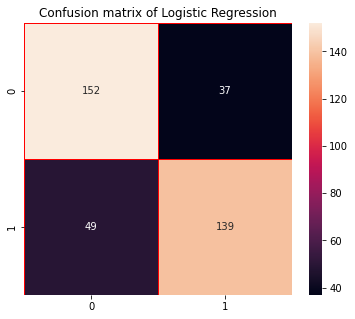

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of Logistic Regression')
plt.show()

## 2. Random Forest Classifier

*******************RESULTS*******************
The accuracy score of train is : 100.0
The accuracy score test is : 86.47214854111405
The cross validation score is : 84.6796460176991
Confusion Matrix: 
 [[165  24]
 [ 27 161]]
Classification                precision    recall  f1-score   support

           0       0.86      0.87      0.87       189
           1       0.87      0.86      0.86       188

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377

***********************************************


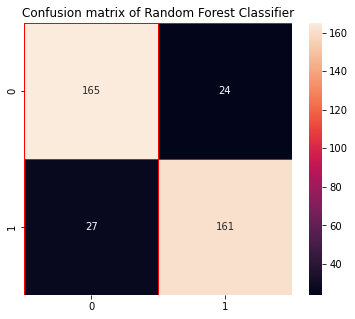

In [77]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of Random Forest Classifier')
plt.show()

## 3. KNeighborsClassifier

*******************RESULTS*******************
The accuracy score of train is : 78.12223206377325
The accuracy score test is : 71.61803713527851
The cross validation score is : 67.76165191740414
Confusion Matrix: 
 [[ 91  98]
 [  9 179]]
Classification                precision    recall  f1-score   support

           0       0.91      0.48      0.63       189
           1       0.65      0.95      0.77       188

    accuracy                           0.72       377
   macro avg       0.78      0.72      0.70       377
weighted avg       0.78      0.72      0.70       377

***********************************************


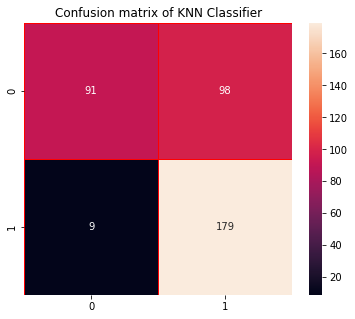

In [78]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of KNN Classifier')
plt.show()

## 4. Adaboost classifier

*******************RESULTS*******************
The accuracy score of train is : 84.76527900797166
The accuracy score test is : 82.49336870026525
The cross validation score is : 82.7299901671583
Confusion Matrix: 
 [[154  35]
 [ 31 157]]
Classification                precision    recall  f1-score   support

           0       0.83      0.81      0.82       189
           1       0.82      0.84      0.83       188

    accuracy                           0.82       377
   macro avg       0.83      0.82      0.82       377
weighted avg       0.83      0.82      0.82       377

***********************************************


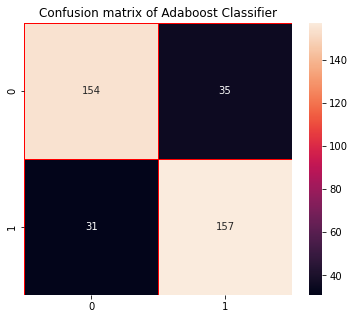

In [79]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred_train = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ada_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of Adaboost Classifier')
plt.show()

## 5. Gradientboosting Classifier

*******************RESULTS*******************
The accuracy score of train is : 93.00265721877768
The accuracy score test is : 85.14588859416446
The cross validation score is : 84.58957718780728
Confusion Matrix: 
 [[157  32]
 [ 24 164]]
Classification                precision    recall  f1-score   support

           0       0.87      0.83      0.85       189
           1       0.84      0.87      0.85       188

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377

***********************************************


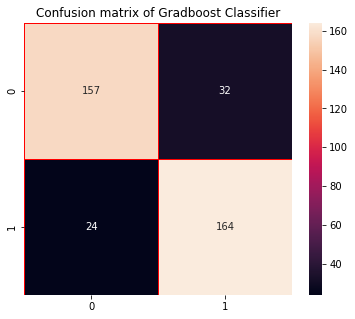

In [80]:
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
y_pred_train = grad_clf.predict(X_train)
y_pred = grad_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(grad_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of Gradboost Classifier')
plt.show()

## 6. SVC

*******************RESULTS*******************
The accuracy score of train is : 91.58547387068202
The accuracy score test is : 82.49336870026525
The cross validation score is : 79.9850540806293
Confusion Matrix: 
 [[162  27]
 [ 39 149]]
Classification                precision    recall  f1-score   support

           0       0.81      0.86      0.83       189
           1       0.85      0.79      0.82       188

    accuracy                           0.82       377
   macro avg       0.83      0.82      0.82       377
weighted avg       0.83      0.82      0.82       377

***********************************************


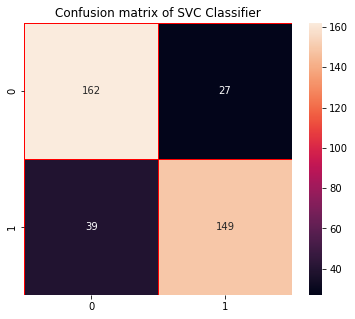

In [82]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_train = svc_clf.predict(X_train)
y_pred = svc_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(svc_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.title('Confusion matrix of SVC Classifier')
plt.show()

#### ADA boosting classifier and Random classifier model has the least difference between CV score and accuracy, Hence selecting these models to improve the accuracy by hyperparameter optimization.

## Hyper parameter optimization

In [88]:
ada_grid = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0] 

grid_search = GridSearchCV(estimator=ada_grid, param_grid=grid, n_jobs=-1, scoring='accuracy')
# execute the grid search
grid_search.fit(X, y)
print(grid_search.best_params_)

{'learning_rate': 1.0, 'n_estimators': 50}


In [89]:
ada_clf = AdaBoostClassifier(learning_rate=1.0, n_estimators=50)
ada_clf.fit(X_train, y_train)
y_pred_train = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ada_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


*******************RESULTS*******************
The accuracy score of train is : 84.76527900797166
The accuracy score test is : 82.49336870026525
The cross validation score is : 82.7299901671583
Confusion Matrix: 
 [[154  35]
 [ 31 157]]
Classification                precision    recall  f1-score   support

           0       0.83      0.81      0.82       189
           1       0.82      0.84      0.83       188

    accuracy                           0.82       377
   macro avg       0.83      0.82      0.82       377
weighted avg       0.83      0.82      0.82       377

***********************************************


In [90]:
parameters={'n_estimators' : [30,40,50,80,100,125],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,15,18,25,30,40,50,60,3]}
rand_grid = RandomForestClassifier()
gridcv=GridSearchCV(rand_grid, param_grid=parameters, n_jobs=-1)
gridcv.fit(X_train, y_train)
print(gridcv.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 125, 'random_state': 50}


In [91]:
rand_clf = RandomForestClassifier(criterion='gini', max_features='auto', n_estimators=125, random_state=50, )
rand_clf.fit(X_train, y_train)
y_pred_train = rand_clf.predict(X_train)
y_pred = rand_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(rand_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

*******************RESULTS*******************
The accuracy score of train is : 100.0
The accuracy score test is : 86.47214854111405
The cross validation score is : 85.29990167158307
Confusion Matrix: 
 [[165  24]
 [ 27 161]]
Classification                precision    recall  f1-score   support

           0       0.86      0.87      0.87       189
           1       0.87      0.86      0.86       188

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377

***********************************************


After the tuning the hyper parameters we could increase the accuracy of random forest   from 84.67 % to 85.29%, and for Adaboosting algorithm no much difference was seen.

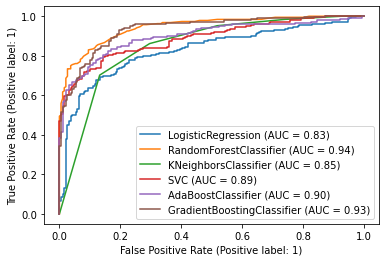

In [92]:
graph =plot_roc_curve(log_reg,X_test,y_test)    
plot_roc_curve(rand_clf,X_test,y_test,ax = graph.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax = graph.ax_)
plot_roc_curve(svc_clf,X_test,y_test,ax = graph.ax_)
plot_roc_curve(ada_clf,X_test,y_test,ax = graph.ax_)
plot_roc_curve(grad_clf,X_test,y_test,ax = graph.ax_)
 
plt.show()

**We can see from the graph that Area under curve for Random Forest Classifier, and gradient boosting classifier is highest.**

### Saving the best model into pickle.

In [94]:
import pickle
filename="Insurance Claims Fraud Detection.pkl "
pickle.dump(rand_clf, open(filename,'wb'))